In [43]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm
from itertools import cycle
import optbinning
import lightgbm as lgb
import xgboost as xgb
import catboost as cat

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
df_accepted=pd.read_csv('cs_accepted.csv')

In [4]:
df_rejected=pd.read_csv('cs_rejected.csv')

In [5]:
frames = [df_rejected,df_accepted]

In [6]:
df= pd.concat(frames)

In [7]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5994722,F,N,Y,0,405000.0,Commercial associate,Higher education,Single / not married,House / apartment,-13292,-3569,1,1,1,0,Core staff,1,NaN
1,5542056,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9939,-1275,1,0,0,0,NaN,3,NaN
2,5804787,F,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21069,365243,1,0,0,0,NaN,2,NaN
3,6059876,F,Y,N,1,180000.0,Working,Higher education,Married,House / apartment,-16411,-6311,1,0,0,0,Managers,3,NaN
4,5322444,F,N,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-20000,-5460,1,1,1,0,NaN,2,NaN


In [8]:
df=df.sample(frac=1)

In [9]:
df['Flag']=np.where(df['STATUS'].isnull(), 'Rejected','Accepted' )

In [10]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
2508,5690727,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Civil marriage,Rented apartment,-9078,-1400,1,1,0,0,NaN,2,NaN,Rejected
7542,5115603,F,N,N,0,225000.0,Working,Higher education,Married,House / apartment,-15966,-3055,1,0,0,0,Core staff,2,0.0,Accepted
1274,5858646,F,Y,Y,0,405000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-19061,-6265,1,0,0,0,Medicine staff,2,NaN,Rejected
5738,5090865,M,N,N,0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14216,-1923,1,0,0,1,Sales staff,1,0.0,Accepted
9417,5149222,F,N,Y,0,247500.0,Commercial associate,Higher education,Widow,House / apartment,-23339,-1233,1,0,1,0,NaN,1,0.0,Accepted


In [11]:
df['Flag'].value_counts(normalize=True)

Rejected    0.5
Accepted    0.5
Name: Flag, dtype: float64

<AxesSubplot:xlabel='Flag', ylabel='count'>

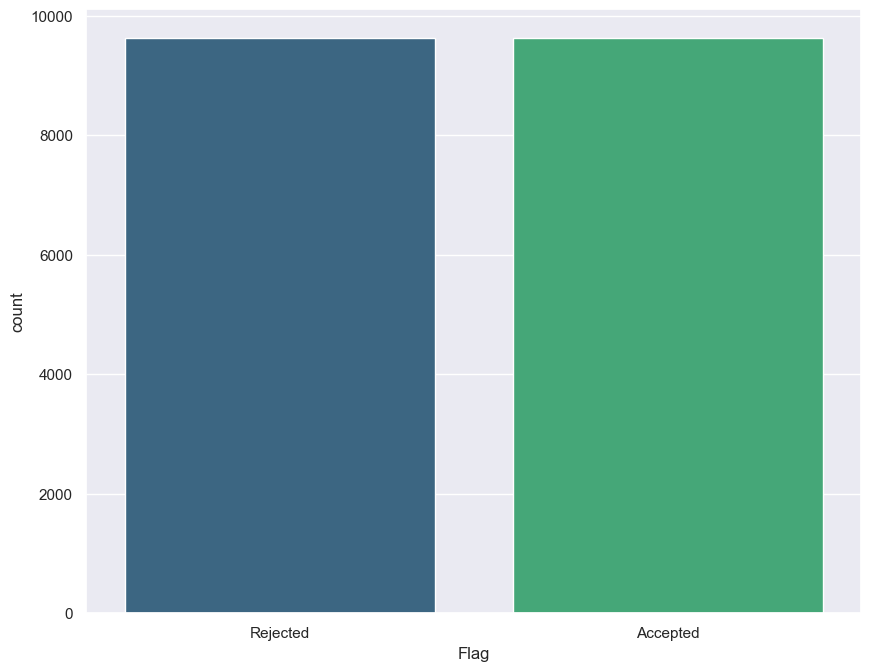

In [12]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Flag',palette='viridis')

In [13]:
df.isna().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        5771
CNT_FAM_MEMBERS           0
STATUS                 9626
Flag                      0
dtype: int64

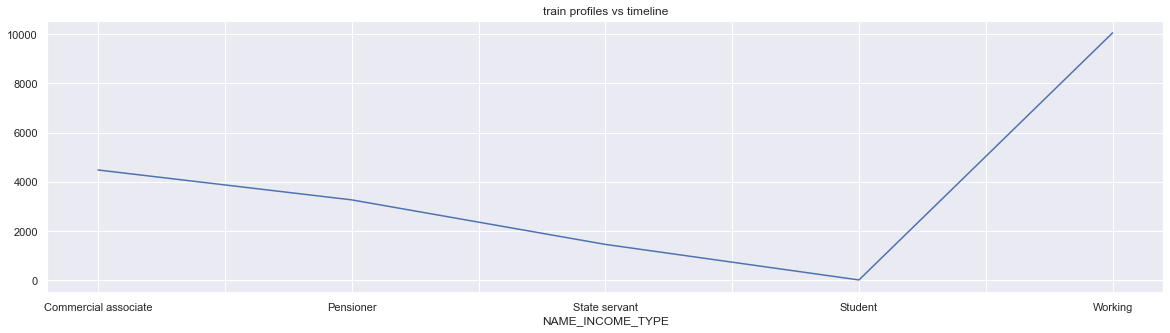

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
df.groupby("NAME_INCOME_TYPE")['ID'].count().plot()
plt.title("train profiles vs timeline")
plt.show()

In [34]:
df['Flag']=np.where(df['Flag']=='Rejected', '0','1' )

In [35]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Flag
2508,5690727,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Civil marriage,Rented apartment,-9078,-1400,1,1,0,0,NaN,2,NaN,0
7542,5115603,F,N,N,0,225000.0,Working,Higher education,Married,House / apartment,-15966,-3055,1,0,0,0,Core staff,2,0.0,1
1274,5858646,F,Y,Y,0,405000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-19061,-6265,1,0,0,0,Medicine staff,2,NaN,0
5738,5090865,M,N,N,0,405000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-14216,-1923,1,0,0,1,Sales staff,1,0.0,1
9417,5149222,F,N,Y,0,247500.0,Commercial associate,Higher education,Widow,House / apartment,-23339,-1233,1,0,1,0,NaN,1,0.0,1


In [42]:
!pip -q install catboost